In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from Helpers import plot_train_stat_per_epoch

In [6]:
# Source: https://www.kaggle.com/c/twitter-sentiment-analysis2/data
# train: https://www.kaggle.com/c/6740/download/train.csv
# test: https://www.kaggle.com/c/6740/download/test.csv

df = pd.read_csv('train.csv', encoding='latin-1')
df

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
5,6,0,or i just worry too much?
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,8,0,Sunny Again Work Tomorrow :-| ...
8,9,1,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-)


In [145]:
df.iloc[8]['SentimentText']

'      handed in my uniform today . i miss you already'

In [8]:
X = df['SentimentText'].values
y = df['Sentiment'].values

In [11]:
from keras.preprocessing.text import Tokenizer

tk = Tokenizer()
tk.fit_on_texts(X)

In [60]:
len(tk.word_index)

106612

(array([5.4866e+04, 4.2494e+04, 2.6260e+03, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  1. ,  13.6,  26.2,  38.8,  51.4,  64. ,  76.6,  89.2, 101.8,
        114.4, 127. ]),
 <a list of 10 Patch objects>)

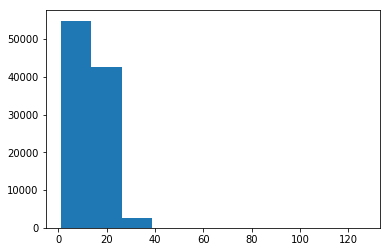

In [17]:
plt.hist([len(tweet.split()) for tweet in X])

In [171]:
maxlen = 30

In [61]:
max_words = 10000
tk.num_words = max_words

In [62]:
X_seq = tk.texts_to_sequences(X)

In [63]:
from keras.preprocessing.sequence import pad_sequences

X_pad = pad_sequences(X_seq, maxlen=maxlen)

In [64]:
X_pad.shape

(99989, 30)

In [65]:
y.shape

(99989,)

# let's skip one-hot first and try (can skip)

In [290]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.33, random_state=0)

In [291]:
X_train.shape

(66992, 30)

In [293]:
train_samples = int(X_train.shape[0] * 0.7)
X_train_part = X_train[:train_samples]
y_train_part = y_train[:train_samples]
X_val = X_train[train_samples:]
y_val = y_train[train_samples:]

In [69]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_part, y_train_part)

GaussianNB(priors=None)

In [70]:
nb.score(X_val, y_val)

0.5624937804756692

In [82]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(30,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                992       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [85]:
history = model.fit(X_train_part, y_train_part, validation_data=(X_val, y_val), batch_size=32, epochs=50, verbose=2)
# got ~0.56

Train on 46894 samples, validate on 20098 samples
Epoch 1/50
 - 2s - loss: 0.7319 - binary_accuracy: 0.5566 - val_loss: 0.7128 - val_binary_accuracy: 0.5593
Epoch 2/50
 - 2s - loss: 0.7094 - binary_accuracy: 0.5667 - val_loss: 0.7063 - val_binary_accuracy: 0.5630
Epoch 3/50
 - 2s - loss: 0.7054 - binary_accuracy: 0.5674 - val_loss: 0.7087 - val_binary_accuracy: 0.5622
Epoch 4/50
 - 2s - loss: 0.7028 - binary_accuracy: 0.5672 - val_loss: 0.7117 - val_binary_accuracy: 0.5640
Epoch 5/50
 - 2s - loss: 0.7037 - binary_accuracy: 0.5676 - val_loss: 0.7074 - val_binary_accuracy: 0.5637
Epoch 6/50
 - 2s - loss: 0.7070 - binary_accuracy: 0.5672 - val_loss: 0.7053 - val_binary_accuracy: 0.5638
Epoch 7/50
 - 2s - loss: 0.7050 - binary_accuracy: 0.5683 - val_loss: 0.7048 - val_binary_accuracy: 0.5633
Epoch 8/50
 - 2s - loss: 0.7017 - binary_accuracy: 0.5679 - val_loss: 0.7026 - val_binary_accuracy: 0.5641
Epoch 9/50
 - 2s - loss: 0.7011 - binary_accuracy: 0.5679 - val_loss: 0.7171 - val_binary_accu

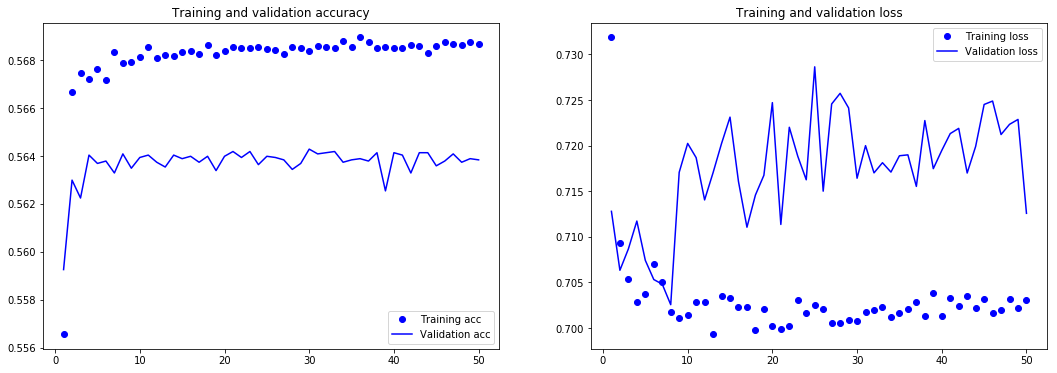

In [87]:
plot_train_stat_per_epoch(history.history)

# Okay seems better to do one-hot

In [86]:
def one_hot_encode_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [88]:
X_oht = one_hot_encode_sequences(X_pad, dimension=max_words)

In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_oht, y, test_size=0.33, random_state=0)

In [163]:
X_train.shape

(66992, 10000)

In [164]:
train_samples = int(X_train.shape[0] * 0.7)
X_train_part = X_train[:train_samples]
y_train_part = y_train[:train_samples]
X_val = X_train[train_samples:]
y_val = y_train[train_samples:]

In [93]:
# from sklearn.naive_bayes import GaussianNB
# nb = GaussianNB()
# nb.fit(X_train_part, y_train_part)

GaussianNB(priors=None)

In [94]:
# nb.score(X_val, y_val)

0.5201512588317245

In [181]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
def model_1():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(max_words,)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])
    model.summary()
    
    return model

In [178]:
model = model_1()
history = model.fit(X_train_part, y_train_part, validation_data=(X_val, y_val), batch_size=32, epochs=10, verbose=2)
# peak at (9, 0.7684)

Train on 46894 samples, validate on 20098 samples
Epoch 1/10
 - 15s - loss: 0.5302 - binary_accuracy: 0.7400 - val_loss: 0.5035 - val_binary_accuracy: 0.7581
Epoch 2/10
 - 13s - loss: 0.4733 - binary_accuracy: 0.7797 - val_loss: 0.5020 - val_binary_accuracy: 0.7629
Epoch 3/10
 - 15s - loss: 0.4593 - binary_accuracy: 0.7915 - val_loss: 0.5009 - val_binary_accuracy: 0.7655
Epoch 4/10
 - 15s - loss: 0.4509 - binary_accuracy: 0.7974 - val_loss: 0.5002 - val_binary_accuracy: 0.7689
Epoch 5/10
 - 15s - loss: 0.4448 - binary_accuracy: 0.8003 - val_loss: 0.5042 - val_binary_accuracy: 0.7659
Epoch 6/10
 - 14s - loss: 0.4407 - binary_accuracy: 0.8033 - val_loss: 0.5040 - val_binary_accuracy: 0.7691
Epoch 7/10
 - 14s - loss: 0.4374 - binary_accuracy: 0.8055 - val_loss: 0.5023 - val_binary_accuracy: 0.7682
Epoch 8/10
 - 14s - loss: 0.4345 - binary_accuracy: 0.8061 - val_loss: 0.5007 - val_binary_accuracy: 0.7679
Epoch 9/10
 - 14s - loss: 0.4321 - binary_accuracy: 0.8086 - val_loss: 0.5016 - val_bi

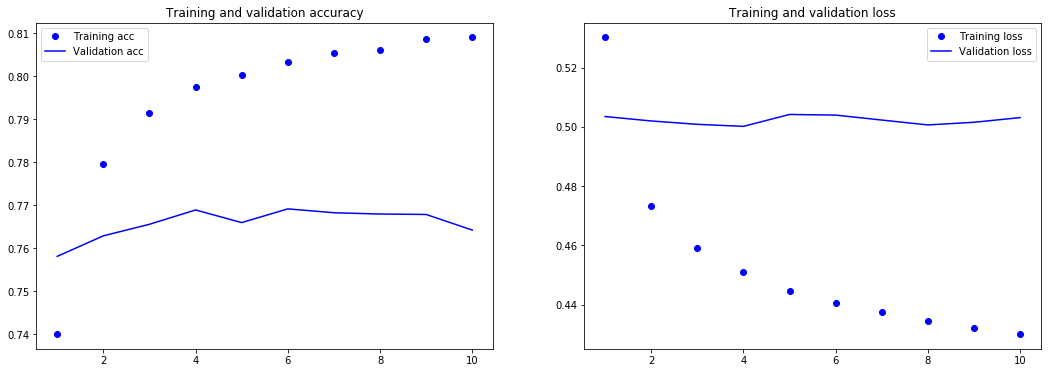

In [179]:
plot_train_stat_per_epoch(history.history)

In [183]:
del model
model = model_1()
model.fit(X_train_part, y_train_part, validation_data=(X_val, y_val), batch_size=32, epochs=6, verbose=2)

Train on 46894 samples, validate on 20098 samples
Epoch 1/6
 - 13s - loss: 0.5311 - binary_accuracy: 0.7390 - val_loss: 0.5063 - val_binary_accuracy: 0.7563
Epoch 2/6
 - 13s - loss: 0.4752 - binary_accuracy: 0.7814 - val_loss: 0.5029 - val_binary_accuracy: 0.7613
Epoch 3/6
 - 13s - loss: 0.4605 - binary_accuracy: 0.7908 - val_loss: 0.5011 - val_binary_accuracy: 0.7676
Epoch 4/6
 - 13s - loss: 0.4519 - binary_accuracy: 0.7969 - val_loss: 0.5021 - val_binary_accuracy: 0.7648
Epoch 5/6
 - 13s - loss: 0.4461 - binary_accuracy: 0.8004 - val_loss: 0.5022 - val_binary_accuracy: 0.7659
Epoch 6/6
 - 13s - loss: 0.4425 - binary_accuracy: 0.8029 - val_loss: 0.5029 - val_binary_accuracy: 0.7670


In [184]:
model.evaluate(X_test, y_test)

32997/32997 [==============================] - 5s 166us/step


[0.4999716193866675, 0.7711913204248751]

# Demo time

In [258]:
tweet = tk.texts_to_sequences(['Awesome!! Good work man', "That looks okay", 'This demo sucks -_-"'])

In [259]:
tweet_pad = pad_sequences(tweet, maxlen=maxlen)

In [260]:
tweeet_oht = one_hot_encode_sequences(tweet_pad, dimension=max_words)

In [261]:
model.predict(tweeet_oht)

array([[0.8685468 ],
       [0.4870661 ],
       [0.03392201]], dtype=float32)